In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import classification_report, confusion_matrix

import time

In [3]:
iris = pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1.0,5.1,3.5,1.4,0.2,Iris-setosa
1,2.0,4.9,NaN,1.4,0.2,Iris-setosa
2,3.0,4.7,3.2,1.3,0.2,Iris-setosa
3,NaN,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,NaN,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             137 non-null    float64
 1   SepalLengthCm  141 non-null    float64
 2   SepalWidthCm   144 non-null    float64
 3   PetalLengthCm  143 non-null    float64
 4   PetalWidthCm   142 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [6]:
iris.rename(columns={'SepalLengthCm':'SepalLength',
                     'SepalWidthCm':'SepalWidth',
                     'PetalWidthCm':'PetalWidth',
                     'PetalLengthCm':'PetalLength'},inplace=True)

In [7]:
iris.drop("Id", axis=1, inplace=True)
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,NaN,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,NaN,1.4,0.2,Iris-setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  141 non-null    float64
 1   SepalWidth   144 non-null    float64
 2   PetalLength  143 non-null    float64
 3   PetalWidth   142 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Handling the missing data

In [9]:
avg_sepal_length = iris.SepalLength.mean()
iris.SepalLength.fillna(avg_sepal_length, inplace = True)

In [10]:
avg_sepal_width = iris.SepalWidth.mean()
iris.SepalWidth.fillna(avg_sepal_width, inplace = True)

In [11]:
avg_petal_length = iris.PetalLength.mean()
iris.PetalLength.fillna(avg_petal_length, inplace = True)

In [12]:
avg_petal_width = iris.PetalWidth.mean()
iris.PetalWidth.fillna(avg_petal_width, inplace = True)

In [13]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
iris.shape

(150, 5)

In [15]:
iris.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.832624,3.047917,3.767832,1.221127
std,0.811701,0.411572,1.714236,0.744269
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.375000,3.300000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


In [16]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

Text(0, 0.5, 'Petal Length')

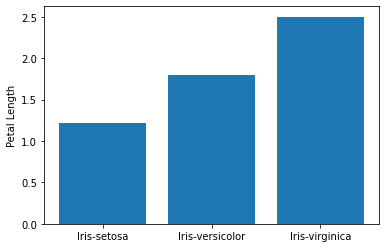

In [17]:
plt.bar(iris['Species'], iris['PetalWidth'])
plt.ylabel('Petal Length')

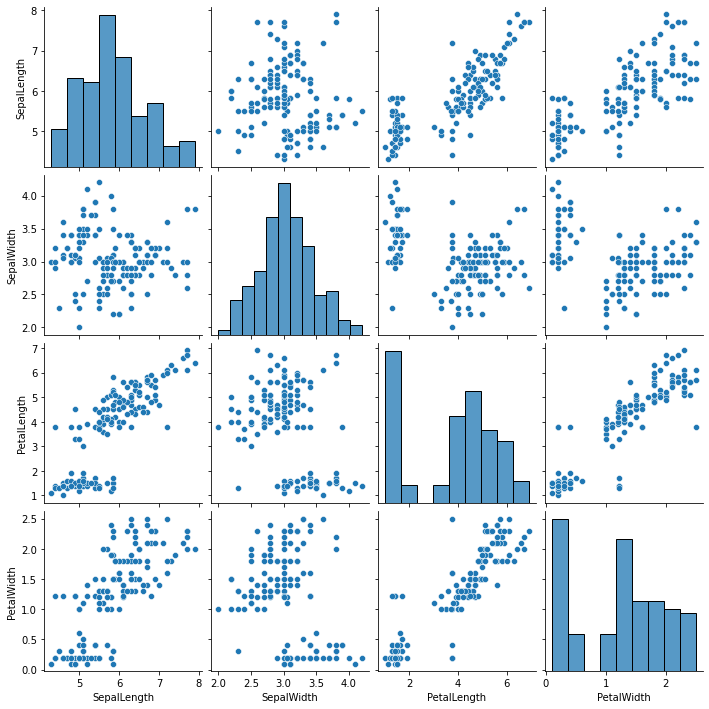

In [18]:
sns.pairplot(iris)

[]

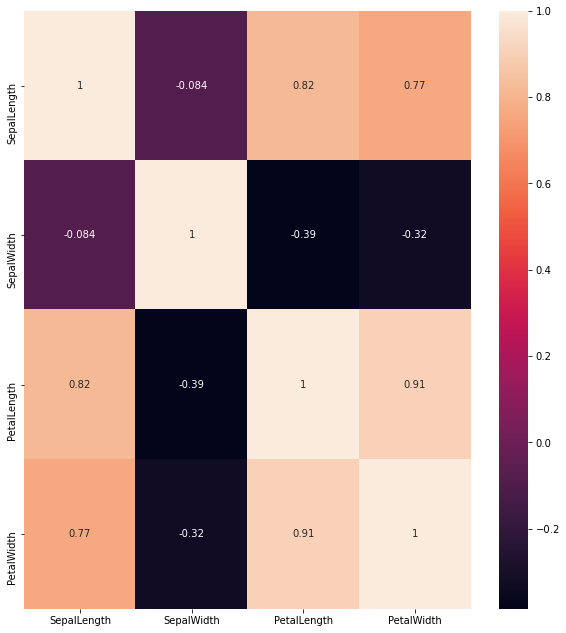

In [19]:
plt.figure(figsize=(10,11))
sns.heatmap(iris.corr(),annot=True)
plt.plot()

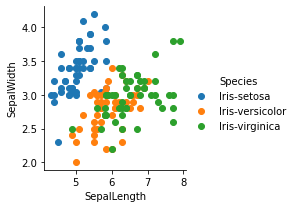

In [20]:
sns.FacetGrid(iris,hue='Species').map(plt.scatter,'SepalLength','SepalWidth').add_legend()
plt.show()

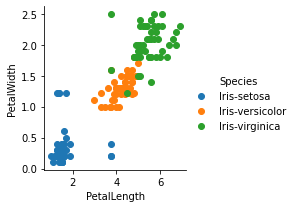

In [21]:
sns.FacetGrid(iris,hue='Species').map(plt.scatter,'PetalLength','PetalWidth').add_legend()
plt.show()

# Data Preprocessing

In [22]:
#label_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [23]:
#iris.replace({'Species': label_dict}, inplace = True)

In [24]:
#iris.sort_values('Species')

In [25]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [26]:
# Data
X = iris.drop('Species', axis =1 )
X

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.100000,3.500000,1.4,0.2
1,4.900000,3.047917,1.4,0.2
2,4.700000,3.200000,1.3,0.2
3,4.600000,3.100000,1.5,0.2
4,5.000000,3.047917,1.4,0.2
...,...,...,...,...
145,5.832624,3.000000,5.2,2.3
146,6.300000,2.500000,5.0,1.9
147,6.500000,3.000000,5.2,2.0
148,6.200000,3.400000,5.4,2.3


In [27]:
# labels
y = iris['Species']
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [28]:
from sklearn.preprocessing import LabelEncoder

L_E = LabelEncoder()

y = L_E.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Converting the dataset into numpy array for processing

In [29]:
X = np.array(X)
X

array([[5.1       , 3.5       , 1.4       , 0.2       ],
       [4.9       , 3.04791667, 1.4       , 0.2       ],
       [4.7       , 3.2       , 1.3       , 0.2       ],
       [4.6       , 3.1       , 1.5       , 0.2       ],
       [5.        , 3.04791667, 1.4       , 0.2       ],
       [5.4       , 3.9       , 3.76783217, 0.4       ],
       [4.6       , 3.4       , 1.4       , 1.22112676],
       [5.        , 3.4       , 1.5       , 0.2       ],
       [4.4       , 2.9       , 1.4       , 0.2       ],
       [5.83262411, 3.1       , 1.5       , 0.1       ],
       [5.4       , 3.7       , 1.5       , 0.2       ],
       [4.8       , 3.4       , 3.76783217, 0.2       ],
       [4.8       , 3.        , 1.4       , 0.1       ],
       [4.3       , 3.        , 1.1       , 0.1       ],
       [5.8       , 4.        , 1.2       , 0.2       ],
       [5.7       , 3.04791667, 1.5       , 0.4       ],
       [5.4       , 3.9       , 1.3       , 0.4       ],
       [5.1       , 3.5       ,

In [30]:
train_data, test_data, train_label, test_label = train_test_split(X, y, test_size = 0.3 , random_state = 0, stratify = y)

In [31]:
# normalizing the data
train_data = preprocessing.normalize(train_data)
test_data = preprocessing.normalize(test_data)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler().fit(train_data)
train_data = sc.transform(train_data)
test_data = sc.transform(test_data)

In [33]:
train_data.size

420

In [34]:
test_data.size

180

# Training the models

# 1) Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_data, train_label)

DecisionTreeClassifier()

In [36]:
DT_predict = DT.predict(test_data)
DT_accuracy = accuracy_score(test_label, DT_predict)*100
DT_accuracy

88.88888888888889

# 2) K Nearest Neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_data, train_label)

KNeighborsClassifier()

In [38]:
knn_predict = knn.predict(test_data)
knn_accuracy = accuracy_score(test_label, knn_predict)*100
knn_accuracy

95.55555555555556

In [39]:
custom_input = np.array([[1,1,1,1]])
prediction = knn.predict(custom_input)
prediction[0]

1

# 3) Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(train_data, train_label)

LogisticRegression()

In [41]:
lr_predict = LR.predict(test_data)
lr_accuracy = accuracy_score(test_label, lr_predict)*100
lr_accuracy

93.33333333333333

# 4) Random Forest 

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(train_data, train_label)

RandomForestClassifier()

In [43]:
rf_predict = RF.predict(test_data)
rf_accuracy = accuracy_score(test_label, rf_predict)*100
rf_accuracy

93.33333333333333

# 5) SVC

In [44]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_data, train_label)

SVC(kernel='linear')

In [45]:
svc_predict = svc.predict(test_data)
svc_accuracy = accuracy_score(test_label, svc_predict)*100
svc_accuracy

93.33333333333333

# Evaluation

In [46]:
print("Accuracy of Decision Tree is ", DT_accuracy)
print("Accuracy of K-Nearest Neighbor is ", knn_accuracy)
print("Accuracy of Logistic Regression is ", lr_accuracy)
print("Accuracy of Random Forest is ", rf_accuracy)
print("Accuracy of Support Vector Machine is ", svc_accuracy)

Accuracy of Decision Tree is  88.88888888888889
Accuracy of K-Nearest Neighbor is  95.55555555555556
Accuracy of Logistic Regression is  93.33333333333333
Accuracy of Random Forest is  93.33333333333333
Accuracy of Support Vector Machine is  93.33333333333333


In [47]:
print("Confusion Matrix of Decision Tree: ")
print(confusion_matrix(test_label, DT_prediction))

print("Confusion Matrix of K-Nearest Neighbor: ")
print(confusion_matrix(test_label, knn_predict))

print("Confusion Matrix of Logistic Regression: ")
print(confusion_matrix(test_label, lr_predict))

print("Confusion Matrix of Random Forest: ")
print(confusion_matrix(test_label, rf_predict))

print("Confusion Matrix of Support Vector Machine: ")
print(confusion_matrix(test_label, svc_predict))

Confusion Matrix of Decision Tree: 


NameError: name 'DT_prediction' is not defined

In [48]:
print("Precision, Recall and f1-score of Decision Tree: ")
print(classification_report(test_label, DT_predict))

Precision, Recall and f1-score of Decision Tree: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.86      0.80      0.83        15
           2       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [49]:
print("Precision, Recall and f1-score of K-Nearest Neighbor: ")
print(classification_report(test_label, knn_predict))

Precision, Recall and f1-score of K-Nearest Neighbor: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [50]:
print("Precision, Recall and f1-score of Logistic Regression: ")
print(classification_report(test_label, lr_predict))

Precision, Recall and f1-score of Logistic Regression: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [51]:
print("Precision, Recall and f1-score of Random Forest: ")
print(classification_report(test_label, rf_predict))

Precision, Recall and f1-score of Random Forest: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [52]:
print("Precision, Recall and f1-score of Support Vector Machine: ")
print(classification_report(test_label, svc_predict))

Precision, Recall and f1-score of Support Vector Machine: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



# Comparing the actual values with predicting values

In [53]:
print(np.concatenate((DT_predict.reshape(len(DT_predict),1), test_label.reshape(len(test_label),1)),1))

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 1]
 [2 2]
 [0 0]
 [2 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [2 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 2]]


In [54]:
print(np.concatenate((lr_predict.reshape(len(lr_predict),1), test_label.reshape(len(test_label),1)),1))

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]]


In [55]:
print(np.concatenate((knn_predict.reshape(len(knn_predict),1), test_label.reshape(len(test_label),1)),1))

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]]


In [56]:
print(np.concatenate((rf_predict.reshape(len(rf_predict),1), test_label.reshape(len(test_label),1)),1))

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]]


In [57]:
print(np.concatenate((svc_predict.reshape(len(svc_predict),1), test_label.reshape(len(test_label),1)),1))

[[2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [0 0]
 [1 1]
 [1 2]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [2 2]]


In [58]:
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=[0, 1, 2])
#ROC Curve
from sklearn.metrics import roc_curve
y_pred_prob1 = DT.predict_proba(test_data)[:,2]
fpr1 , tpr1, thresholds1 = roc_curve(y, y_pred_prob1)

y_pred_prob2 = LR.predict_proba(test_data)[:,2]
fpr2 , tpr2, thresholds2 = roc_curve(y, y_pred_prob2)

y_pred_prob3 = knn.predict_proba(test_data)[:,2]
fpr3 , tpr3, thresholds3 = roc_curve(y, y_pred_prob3)

y_pred_prob4 = RF.predict_proba(test_data)[:,2]
fpr4 , tpr4, thresholds4 = roc_curve(y, y_pred_prob4)

y_pred_prob5 = RF.predict_proba(test_data)[:,2]
fpr5 , tpr5, thresholds5 = roc_curve(y, y_pred_prob5)


plt.plot([0,1,2],[0,1,2], 'k--')
plt.plot(fpr1, tpr1, label= "Decision Tree")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "K-Nearest Neighbor")
plt.plot(fpr4, tpr4, label= "Random Forest")
plt.plot(fpr4, tpr4, label= "Support Vector Machine")
plt.legend()
plt.xlabel("False Positive Rate", size = 14)
plt.ylabel("True Positive Rate", size = 14)
plt.title('Receiver Operating Characteristic')
plt.show()

ValueError: multilabel-indicator format is not supported

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(train_data, train_label) # train the model
    y_pred=model.predict(test_data) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(test_label, model.predict_proba(test_label)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(test_label, model.predict(test_data))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

ValueError: Expected 2D array, got 1D array instead:
array=[2 2 0 0 1 0 1 2 0 1 0 2 0 2 1 2 1 1 1 0 1 2 0 1 2 2 2 2 1 2 1 0 0 1 1 2 1
 0 0 1 0 2 0 0 2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<Figure size 432x288 with 0 Axes>

In [ ]:
Catagory_knn=['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
Catagory_knn

In [ ]:
colormap = np.array(['Red','green','blue'])
fig = plt.scatter(iris['PetalLength'],iris['PetalWidth'], c=colormap[knn.labels_], s=50)

In [ ]:
new_labels= knn.labels_
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:,2],X[:,3], c = y , cmap = 'gist_rainbow', edgecolor ='k', s=150)
axes[1].scatter(X[:,2],X[:,3], c=y, cmap='jet', edgecolor='k', s=150)
axes[0].set_title('Actual', fontsize = 18)
axes[1].set_title('Predicted', fontsize = 18)

In [ ]:
X_knn = np.array([[1 ,1, 1, 1]])

X_nn_prediction = knn.predict(X_knn)
X_knn_prediction[0]
print(Catagory_knn[int(X_knn_prediction[0])])

# Training a CNN model for iris dataset

In [73]:
from tensorflow.keras import models
from tensorflow.keras.layers import*

import time

In [74]:
model = models.Sequential()

model.add(Dense(2028, activation = 'relu', input_shape = (train_data.shape[1],)))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

In [75]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [81]:
#time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{round(s,1)}"

In [82]:
start_time = time.time()

#model.fit(x =img_train, y =label_train, batch_size=32, epochs=10, validation_data=(img_val, label_val))
model.fit(train_data, train_label, epochs = 20)

end_time = time.time()
execution_time = (end_time - start_time)
print(f"Elapsed time: {hms_string(execution_time)}")

Epoch 1/20
4/4 [==============================] - 1s 3ms/step - loss: 0.9889 - acc: 0.3842
Epoch 2/20
4/4 [==============================] - 0s 3ms/step - loss: 0.5733 - acc: 0.7995
Epoch 3/20
4/4 [==============================] - 0s 4ms/step - loss: 0.4238 - acc: 0.8175
Epoch 4/20
4/4 [==============================] - 0s 3ms/step - loss: 0.3103 - acc: 0.8710
Epoch 5/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2603 - acc: 0.9077
Epoch 6/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2455 - acc: 0.8852
Epoch 7/20
4/4 [==============================] - 0s 3ms/step - loss: 0.2173 - acc: 0.9095
Epoch 8/20
4/4 [==============================] - 0s 4ms/step - loss: 0.2168 - acc: 0.9202
Epoch 9/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1682 - acc: 0.9365
Epoch 10/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1404 - acc: 0.9604
Epoch 11/20
4/4 [==============================] - 0s 4ms/step - loss: 0.1148 - acc: 0.96

In [84]:
loss ,accuracy = model.evaluate(test_data, test_label)

2/2 [==============================] - 0s 3ms/step - loss: 0.3925 - acc: 0.9556


In [85]:
print("train accuracy : ", accuracy*100)

train accuracy :  95.55555582046509


In [86]:
loss ,accuracy = model.evaluate(train_data, train_label)

4/4 [==============================] - 0s 2ms/step - loss: 0.0371 - acc: 0.9905


In [87]:
print("Test accuracy : ", accuracy*100)

Test accuracy :  99.04761910438538


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2028)              10140     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               259712    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 270,239
Trainable params: 270,239
Non-trainable params: 0
_________________________________________________________________


In [143]:
history = model.history.history

for key in history.keys():
    print(key)

In [93]:
#from tensorflow.keras.utils import to_categorical
pred = model.predict_classes(test_data)
pred

C:\Users\MirZA107\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       2], dtype=int64)

In [94]:
model.predict(test_data)

array([[2.58629734e-06, 6.45512203e-03, 9.93542314e-01],
       [1.08021663e-06, 1.81102077e-03, 9.98187840e-01],
       [9.99995947e-01, 3.99447072e-06, 6.27186192e-10],
       [9.99989867e-01, 1.00948873e-05, 2.23774919e-08],
       [2.81934685e-04, 9.99581039e-01, 1.37015624e-04],
       [9.99929070e-01, 7.09651067e-05, 1.31234259e-08],
       [9.12331278e-04, 8.04487944e-01, 1.94599748e-01],
       [3.41713821e-05, 4.14109789e-02, 9.58554864e-01],
       [9.99998689e-01, 1.25199301e-06, 1.65195679e-09],
       [1.20476529e-03, 8.52623880e-01, 1.46171376e-01],
       [9.99996662e-01, 3.29334080e-06, 4.02476008e-09],
       [1.78952414e-05, 2.05442682e-02, 9.79437828e-01],
       [9.99993920e-01, 6.04688785e-06, 8.99721353e-10],
       [4.56892412e-05, 9.70946997e-02, 9.02859628e-01],
       [5.49588294e-04, 9.99198139e-01, 2.52249360e-04],
       [5.14049589e-06, 4.46622167e-03, 9.95528638e-01],
       [5.58564279e-05, 5.68831384e-01, 4.31112707e-01],
       [3.10714968e-04, 9.99563

In [95]:
classes = np.argmax(pred, axis = 0)
print(classes)

0
